ЗОДАЧИ НА ЗАВТРО:
ИЗ ДАТАССЕТА ИЩУ ВЕРМЯ ИГР И ПРАЙМТАЙМ ГЕРОЕВ(СЛОВАРЬ)(EARLY,MID,LATE) И ИХ ВИНРЕЙТ ДЛЯ ЭТИХ ЗНАЧЕНИЙ
ФУНКЦИЯ СР ВИНРЕЙТА ЧАРОВ В EARLY MID LATE У РАДИАНТ И ДАЙР

ПОДРЕДАКТИРУЙ ФУНКЦИЮ PREDICTION(ВЕРОЯТНОСТЬ ПОБЕДЫ В EARLY MID LATE) ДЛЯ КАЖДОГО ЭТАПА ИГРЫ

УДАЧИ НАХЕР КОЛИЧЕСТВО РЕНЖЕЙ


ПРИ ОБУЧЕНИИ ТАРГЕТ-ВРЕМЯ ИГРЫ, ДАТА-ПРОЦЕНТЫ СИЛЫ В ТАЙМ

In [1]:
import numpy as np
import pandas as pd
from enum import Enum
from itertools import combinations, product
import ast

In [2]:
class dota(Enum):
  ANTIMAGE = 1
  AXE = 2
  BANE = 3
  BLOODSEEKER = 4
  CRYSTAL_MAIDEN = 5
  DROW_RANGER = 6
  EARTHSHAKER = 7
  JUGGERNAUT = 8
  MIRANA = 9
  MORPHLING = 10
  SHADOW_FIEND = 11
  PHANTOM_LANCER = 12
  PUCK = 13
  PUDGE = 14
  RAZOR = 15
  SAND_KING = 16
  STORM_SPIRIT = 17
  SVEN = 18
  TINY = 19
  VENGEFULSPIRIT = 20
  WINDRUNNER = 21
  ZUUS = 22
  KUNKKA = 23
  LINA = 25
  LION = 26
  SHADOW_SHAMAN = 27
  SLARDAR = 28
  TIDEHUNTER = 29
  WITCH_DOCTOR = 30
  LICH = 31
  RIKI = 32
  ENIGMA = 33
  TINKER = 34
  SNIPER = 35
  NECROPHOS = 36
  WARLOCK = 37
  BEASTMASTER = 38
  QUEENOFPAIN = 39
  VENOMANCER = 40
  FACELESS_VOID = 41
  WRAITH_KING = 42
  DEATH_PROPHET = 43
  PHANTOM_ASSASSIN = 44
  PUGNA = 45
  TEMPLAR_ASSASSIN = 46
  VIPER = 47
  LUNA = 48
  DRAGON_KNIGHT = 49
  DAZZLE = 50
  CLOCKWERK = 51
  LESHRAC = 52
  FURION = 53
  LIFE_STEALER = 54
  DARK_SEER = 55
  CLINKZ = 56
  OMNIKNIGHT = 57
  ENCHANTRESS = 58
  HUSKAR = 59
  NIGHT_STALKER = 60
  BROODMOTHER = 61
  BOUNTY_HUNTER = 62
  WEAVER = 63
  JAKIRO = 64
  BATRIDER = 65
  CHEN = 66
  SPECTRE = 67
  ANCIENT_APPARITION = 68
  DOOM = 69
  URSA = 70
  SPIRIT_BREAKER = 71
  GYROCOPTER = 72
  ALCHEMIST = 73
  INVOKER = 74
  SILENCER = 75
  OUTWORLD_DESTROYER = 76
  LYCAN = 77
  BREWMASTER = 78
  SHADOW_DEMON = 79
  LONE_DRUID = 80
  CHAOS_KNIGHT = 81
  MEEPO = 82
  TREANT = 83
  OGRE_MAGI = 84
  UNDYING = 85
  RUBICK = 86
  DISRUPTOR = 87
  NYX_ASSASSIN = 88
  NAGA_SIREN = 89
  KEEPER_OF_THE_LIGHT = 90
  WISP = 91
  VISAGE = 92
  SLARK = 93
  MEDUSA = 94
  TROLL_WARLORD = 95
  CENTAUR = 96
  MAGNATAUR = 97
  SHREDDER = 98
  BRISTLEBACK = 99
  TUSK = 100
  SKYWRATH_MAGE = 101
  ABADDON = 102
  ELDER_TITAN = 103
  LEGION_COMMANDER = 104
  TECHIES = 105
  EMBER_SPIRIT = 106
  EARTH_SPIRIT = 107
  UNDERLORD = 108
  TERRORBLADE = 109
  PHOENIX = 110
  ORACLE = 111
  WINTER_WYVERN = 112
  ARC_WARDEN = 113
  MONKEY_KING = 114
  DARK_WILLOW = 119
  PANGOLIER = 120
  GRIMSTROKE = 121
  HOODWINK = 123
  VOID_SPIRIT = 126
  SNAPFIRE = 128
  MARS = 129
  RINGMASTER = 131
  DAWNBREAKER = 135
  MARCI = 136
  PRIMAL_BEAST = 137
  MUERTA = 138
  KEZ = 145

In [3]:
players2025 = pd.read_csv("data/players2025.csv")
players202601 = pd.read_csv("data/players202601.csv")
main_metadata2025 = pd.read_csv("data/main_metadata2025.csv")
main_metadata202601 = pd.read_csv("data/main_metadata202601.csv")
heroesdf = pd.read_csv("data/Constants.Heroes.csv")

players = pd.concat([players2025, players202601])
matches = pd.concat([main_metadata2025, main_metadata202601])

C:\Users\User\AppData\Local\Temp\ipykernel_27336\770066594.py:1: DtypeWarning: Columns (0: randomed, 1: pred_vict, 2: neutral_item_history, 3: is_roaming, 4: repicked) have mixed types. Specify dtype option on import or set low_memory=False.
  players2025 = pd.read_csv("data/players2025.csv")


In [4]:
print(players["lane_role"].tolist()[5], players['lane'].tolist()[5], players["lh_t"].tolist()[1],players['hero_id'].apply(lambda x: dota(x).name).tolist()[5],players["match_id"].tolist()[:15], sep="\n\n")

3.0

1.0

[0, 5, 10, 19, 27, 35, 43, 57, 66, 73, 84, 93, 109, 120, 133, 148, 160, 168, 180, 187, 187, 197, 216, 221, 222, 223, 225, 236, 240, 240, 253, 259, 276, 284, 286]

ABADDON

[8107483721, 8107483721, 8107483721, 8107483721, 8107483721, 8107483721, 8107483721, 8107483721, 8107483721, 8107483721, 8107511870, 8107511870, 8107511870, 8107511870, 8107511870]


In [5]:
def synergy(team: list):
    team = np.sort(np.array(team, dtype=np.int16))
    pairs = np.array(list(combinations(team, 2)), dtype=np.int16)
    values = np.fromiter(
        (pair_synergy.get((a, b), 0.5) for a, b in pairs),
        dtype=np.float32,
        count=len(pairs)
    )
    return values.mean()

In [6]:
def counter_synergy(radiant, dire):
  values = np.fromiter(
      (matchup_synergy.get((a,b), 0.0) for a,b in product(radiant,dire)),
      dtype = np.float32
  )
  return values.mean()

In [7]:
def time_strenght(team, duration, duration_ind = 0):
  if duration_ind == 0:
    if duration < 25:
        values = np.array([hero_stats_time.get(a, {}).get(1, 0.0) for a in team], dtype=np.float32)
    elif duration >= 25 and duration < 30:
        values = np.array([hero_stats_time.get(a, {}).get(2, 0.0) for a in team], dtype=np.float32)
    elif duration >= 30 and duration < 32.5:
        values = np.array([hero_stats_time.get(a, {}).get(3, 0.0) for a in team], dtype=np.float32)
    elif duration >= 32.5 and duration < 35:
        values = np.array([hero_stats_time.get(a, {}).get(4, 0.0) for a in team], dtype=np.float32)
    elif duration >= 35 and duration < 37.5:
        values = np.array([hero_stats_time.get(a, {}).get(5, 0.0) for a in team], dtype=np.float32)
    elif duration >= 37.5 and duration < 40:
        values = np.array([hero_stats_time.get(a, {}).get(6, 0.0) for a in team], dtype=np.float32)
    elif duration >= 40 and duration < 50:
        values = np.array([hero_stats_time.get(a, {}).get(7, 0.0) for a in team], dtype=np.float32)
    elif duration >= 50:
        values = np.array([hero_stats_time.get(a, {}).get(8, 0.0) for a in team], dtype=np.float32)
  else:
    values = np.array([hero_stats_time.get(a, {}).get(duration_ind, 0.0) for a in team], dtype=np.float32)
  return values.mean()

In [8]:
'''
data [r1,r2,r3,r4,r5,d1,d2,d3,d4,d5]
target win (0 - radiant 1 dire)
'''
df = players.merge(matches, left_on='match_id', right_on='match_id', how = 'left')
df.rename(columns = {'duration_x':'duration'}, inplace = True )
df.rename(columns = {'radiant_win_x':'radiant_win'}, inplace = True )
df['isRadiant'] = np.where(df['isRadiant']==True, '1', '0').astype(int)
df.rename(columns = {'isRadiant':'teams'}, inplace = True )
df['radiant_win'] = np.where(df['radiant_win']==True, '1', '0').astype(int)

df = df[['match_id', 'hero_id', 'player_slot', 'teams',
             'win', 'radiant_win','duration', 'gold_t', 'lane_role']].dropna()
# df = df[df['duration'] >= 20].copy()
# df = df.drop(df[df['gold_t'] == []].index)
# df = df[len(df['gold_t'].split(', ')) >= 20].copy()
df['gold_t'] = df['gold_t'].apply(ast.literal_eval)
df = df[df['gold_t'].apply(len) >= 15]
df['id'] = df.groupby('match_id').ngroup()
df['gold10'] = df['gold_t'].apply(lambda x: x[10])
df['_grp'] = df.index // 5
df['position'] = (
    df
    .sort_values(['_grp', 'lane_role', 'gold10'])
    .groupby('_grp')
    .cumcount()
    .map(dict(enumerate(np.array([5,1,2,4,3]))))
)

df = df.sort_index().drop(columns=['_grp'])

In [9]:
print(df.info())
d1 = df.copy()
d1['hero_id'] = d1['hero_id'].apply(lambda x: dota(x).name)

<class 'pandas.DataFrame'>
Index: 321250 entries, 0 to 323329
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   match_id     321250 non-null  int64  
 1   hero_id      321250 non-null  int64  
 2   player_slot  321250 non-null  int64  
 3   teams        321250 non-null  int64  
 4   win          321250 non-null  float64
 5   radiant_win  321250 non-null  int64  
 6   duration     321250 non-null  int64  
 7   gold_t       321250 non-null  object 
 8   lane_role    321250 non-null  float64
 9   id           321250 non-null  int64  
 10  gold10       321250 non-null  int64  
 11  position     321250 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 31.9+ MB
None


In [10]:
dota(40)

<dota.VENOMANCER: 40>

In [ ]:
teams_expanded = (df.assign(player_slot=df["player_slot"] +(df.groupby(["id", "player_slot"])
.cumcount()+1))
.pivot_table(index="id", columns="player_slot",values="hero_id"))
hero_position = (
    df.groupby('hero_id')['position']
      .apply(list)
      .to_dict()
)
teams_expanded.columns = range(teams_expanded.shape[1])
teams_expanded.columns = ['r_1','r_2','r_3','r_4','r_5','d_1','d_2','d_3','d_4','d_5']
teams_expanded = teams_expanded.merge(df[['id', 'duration']].drop_duplicates(subset=['id']), on='id', how='left')

,id,r_1,r_2,r_3,r_4,r_5,d_1,d_2,d_3,d_4,d_5,duration
0,0,2.0,11.0,95.0,37.0,101.0,102.0,36.0,46.0,22.0,26.0,2059
1,1,11.0,57.0,86.0,70.0,97.0,41.0,74.0,101.0,2.0,79.0,1856
2,2,20.0,25.0,40.0,38.0,6.0,56.0,58.0,55.0,13.0,100.0,2242
3,3,110.0,135.0,86.0,102.0,95.0,99.0,103.0,49.0,76.0,79.0,1608
4,4,126.0,6.0,40.0,136.0,135.0,67.0,38.0,106.0,138.0,110.0,2545
...,...,...,...,...,...,...,...,...,...,...,...,...
32120,32120,14.0,11.0,107.0,70.0,22.0,25.0,53.0,81.0,49.0,26.0,1557
32121,32121,35.0,14.0,136.0,138.0,107.0,36.0,46.0,9.0,110.0,102.0,2228
32122,32122,51.0,126.0,135.0,131.0,15.0,49.0,108.0,66.0,83.0,13.0,1991
32123,32123,21.0,23.0,78.0,138.0,84.0,100.0,19.0,33.0,128.0,72.0,3318


In [ ]:
teams_expanded.head(10)

,id,r_1,r_2,r_3,r_4,r_5,d_1,d_2,d_3,d_4,d_5,duration
0,0,2.0,11.0,95.0,37.0,101.0,102.0,36.0,46.0,22.0,26.0,2059
1,1,11.0,57.0,86.0,70.0,97.0,41.0,74.0,101.0,2.0,79.0,1856
2,2,20.0,25.0,40.0,38.0,6.0,56.0,58.0,55.0,13.0,100.0,2242
3,3,110.0,135.0,86.0,102.0,95.0,99.0,103.0,49.0,76.0,79.0,1608
4,4,126.0,6.0,40.0,136.0,135.0,67.0,38.0,106.0,138.0,110.0,2545
5,5,52.0,94.0,14.0,79.0,129.0,97.0,31.0,113.0,51.0,70.0,3060
6,6,20.0,46.0,86.0,2.0,11.0,31.0,6.0,49.0,25.0,19.0,1612
7,7,66.0,39.0,49.0,86.0,61.0,18.0,11.0,87.0,88.0,98.0,1345
8,8,14.0,53.0,22.0,96.0,67.0,86.0,84.0,16.0,11.0,70.0,1494
9,9,93.0,21.0,71.0,48.0,27.0,86.0,104.0,84.0,74.0,72.0,1784


In [13]:
target = df.groupby('id').min()[['radiant_win']]
target

,radiant_win
id,
0,0
1,0
2,0
3,1
4,0
...,...
32120,1
32121,0
32122,0


In [88]:
def sort_dict(dictionary):
    a = sorted(dictionary.items(), key = lambda x: x[1])
    end_dict = {}
    for i in a:
        end_dict[i[0]] = i[1]
    return end_dict

def dict_to_hero_list(pos_dict):
    return [hero for hero, _ in sorted(pos_dict.items(), key=lambda x: x[1])]

In [ ]:
teams_data = []
for index, row in teams_expanded.iterrows():
    match_df = df[df['id'] == index]
    hero_pos_match = dict(zip(match_df['hero_id'], match_df['position']))
    radiant_heroes = row[['r_1','r_2','r_3','r_4','r_5']].astype(int)
    radiant_dict = sort_dict({hero: hero_pos_match[hero] for hero in radiant_heroes})
    dire_heroes = row[['d_1','d_2','d_3','d_4','d_5']].astype(int)
    dire_dict = sort_dict({hero: hero_pos_match[hero] for hero in dire_heroes})
    teams_data.append([radiant_dict, dire_dict, target.loc[index, 'radiant_win'], row['duration']])



teams = pd.DataFrame(
    teams_data,
    columns=['radiant', 'dire', 'radiant_win', 'duration']
)
teams

,radiant,dire,radiant_win,duration
0,"{95: 1, 11: 2, 2: 3, 101: 4, 37: 5}","{46: 1, 36: 2, 102: 3, 26: 4, 22: 5}",0,2059.0
1,"{70: 1, 11: 2, 97: 3, 86: 4, 57: 5}","{41: 1, 74: 2, 2: 3, 101: 4, 79: 5}",0,1856.0
2,"{6: 1, 25: 2, 38: 3, 20: 4, 40: 5}","{13: 1, 100: 2, 58: 3, 55: 4, 56: 5}",0,2242.0
3,"{95: 1, 110: 2, 135: 3, 86: 4, 102: 5}","{76: 1, 79: 2, 103: 3, 49: 4, 99: 5}",1,1608.0
4,"{6: 1, 40: 2, 135: 3, 126: 4, 136: 5}","{67: 1, 106: 2, 38: 3, 138: 4, 110: 5}",0,2545.0
...,...,...,...,...
32120,"{70: 1, 11: 2, 14: 3, 107: 4, 22: 5}","{49: 1, 25: 2, 81: 3, 53: 4, 26: 5}",1,1557.0
32121,"{138: 1, 107: 2, 136: 3, 35: 4, 14: 5}","{36: 1, 46: 2, 102: 3, 9: 4, 110: 5}",0,2228.0
32122,"{15: 1, 126: 2, 135: 3, 131: 4, 51: 5}","{49: 1, 13: 2, 108: 3, 66: 4, 83: 5}",0,1991.0
32123,"{21: 1, 23: 2, 78: 3, 138: 4, 84: 5}","{72: 1, 19: 2, 33: 3, 128: 4, 100: 5}",0,3318.0


In [93]:
expanded_rows = []

for _, row in teams.iterrows():
    radiant_heroes = dict_to_hero_list(row['radiant'])
    dire_heroes = dict_to_hero_list(row['dire'])

    expanded_rows.append(
        radiant_heroes + dire_heroes + [row['radiant_win'], row['duration'] / 60]
    )

columns = (
    [f'r_{i}' for i in range(1, 6)] +
    [f'd_{i}' for i in range(1, 6)] +
    ['radiant_win', 'duration']
)

teams_expanded = pd.DataFrame(expanded_rows, columns=columns)
teams_expanded

,r_1,r_2,r_3,r_4,r_5,d_1,d_2,d_3,d_4,d_5,radiant_win,duration
0,95,11,2,101,37,46,36,102,26,22,0,34.316667
1,70,11,97,86,57,41,74,2,101,79,0,30.933333
2,6,25,38,20,40,13,100,58,55,56,0,37.366667
3,95,110,135,86,102,76,79,103,49,99,1,26.800000
4,6,40,135,126,136,67,106,38,138,110,0,42.416667
...,...,...,...,...,...,...,...,...,...,...,...,...
32120,70,11,14,107,22,49,25,81,53,26,1,25.950000
32121,138,107,136,35,14,36,46,102,9,110,0,37.133333
32122,15,126,135,131,51,49,13,108,66,83,0,33.183333
32123,21,23,78,138,84,72,19,33,128,100,0,55.300000


In [83]:
dota(37)

<dota.WARLOCK: 37>

In [70]:
pos_stats = {}
for i, row in teams.iterrows():
    dire_team, radiant_team = row['dire'], row['radiant']
    for (a,b) in radiant_team.items():
        if (a,b) not in pos_stats:
            pos_stats[(a,b)] = {'matches': 0, 'wins': 0}
        pos_stats[(a,b)]['matches'] += 1
        if row['radiant_win'] == 1:
            pos_stats[(a,b)]['wins'] += 1
    for (a,b) in dire_team.items():
        if (a,b) not in pos_stats:
            pos_stats[(a,b)] = {'matches': 0, 'wins': 0}
        pos_stats[(a,b)]['matches'] += 1
        if row['radiant_win'] == 0:
            pos_stats[(a,b)]['wins'] += 1

for hero in heroesdf['id']:
    for pos in range(1,6):
        if (hero, pos) not in pos_stats:
            pos_stats[(hero, pos)] = {'matches': 2, 'wins': 1}


avg_winrate = {}
all_hero_matches = {}
for (hero, _), (_, _) in pos_stats.items():
    w, m = 0, 0
    for pos in range(1, 6):
        w += pos_stats[(hero, pos)]["wins"]
        m += pos_stats[(hero, pos)]["matches"]
    all_hero_matches[hero] = m
    avg_winrate[hero] = w / m



position_stats = {}
for (hero, pos), stats in pos_stats.items():
    k = all_hero_matches[hero]
    avg = avg_winrate[hero]
    position_stats[(hero, pos)] = (pos_stats[(hero, pos)]["wins"] + k * avg) / (pos_stats[(hero, pos)]["matches"] + k)

print(sorted(position_stats.items(), key=lambda x: -x[1]))


[((83, 3), 0.5985790408525755), ((83, 2), 0.5981818181818181), ((83, 1), 0.5955882352941176), ((83, 4), 0.5948136142625607), ((83, 5), 0.5912951167728238), ((61, 1), 0.5851769911504425), ((66, 5), 0.5846994535519126), ((66, 2), 0.5811719500480308), ((66, 3), 0.5793427230046948), ((66, 1), 0.5766283524904214), ((66, 4), 0.5754560530679934), ((89, 5), 0.5731584258324924), ((61, 5), 0.5727411944869831), ((89, 1), 0.570673712021136), ((61, 4), 0.5692307692307692), ((89, 3), 0.5678310316815597), ((89, 2), 0.5657894736842105), ((61, 3), 0.5631517960602549), ((62, 3), 0.5620052770448548), ((33, 3), 0.5619977037887486), ((89, 4), 0.5617715617715617), ((62, 4), 0.55875), ((61, 2), 0.5570719602977667), ((62, 5), 0.5568976478067387), ((62, 1), 0.5567790777701307), ((62, 2), 0.5555555555555555), ((3, 5), 0.5552941176470588), ((90, 4), 0.5552896122546673), ((33, 1), 0.5541922290388548), ((90, 3), 0.5534045393858478), ((3, 2), 0.5531000613873542), ((33, 2), 0.5529531568228105), ((90, 1), 0.551676933

8107483721
8107511870
8107808159
8107860205

In [53]:
dota(12)

<dota.PHANTOM_LANCER: 12>

In [ ]:
carry_matchup = {}
offlane_matchup = {}
mid_matchup = {}
for i, row in teams.iterrows():
    radiant = row['radiant']
    dire = row['dire']
    radiant_win = row['radiant_win']
    radiant_carry, radiant_mid, radiant_offlane, dire_carry, dire_mid, dire_offlane = 0, 0, 0, 0, 0, 0
    for hero, pos in radiant.items():
        match pos:
            case 1:
                radiant_carry = hero
            case 2:
                radiant_mid = hero
            case 3:
                radiant_offlane = hero

    for hero, pos in dire.items():
        match pos:
            case 1:
                dire_carry = hero
            case 2:
                dire_mid = hero
            case 3:
                dire_offlane = hero


    if (radiant_carry, dire_carry) not in carry_matchup:
        carry_matchup[(radiant_carry, dire_carry)] = {"wins" : 1, "matches" : 2}
    if (radiant_mid, dire_mid) not in mid_matchup:
        mid_matchup[(radiant_mid, dire_mid)] = {"wins" : 1, "matches" : 2}
    if (radiant_offlane, dire_offlane) not in offlane_matchup:
        offlane_matchup[(radiant_offlane, dire_offlane)] = {"wins" : 1, "matches" : 2}
    if (dire_carry, radiant_carry) not in carry_matchup:
        carry_matchup[(dire_carry, radiant_carry)] = {"wins" : 1, "matches" : 2}
    if (dire_mid, radiant_mid) not in mid_matchup:
        mid_matchup[(dire_mid, radiant_mid)] = {"wins" : 1, "matches" : 2}
    if (dire_offlane, radiant_offlane) not in offlane_matchup:
        offlane_matchup[(dire_offlane, radiant_offlane)] = {"wins" : 1, "matches" : 2}

    
    if radiant_win == 1:
        carry_matchup[(radiant_carry, dire_carry)]["wins"] += 1
        mid_matchup[(radiant_mid, dire_mid)]["wins"] += 1
        offlane_matchup[(radiant_offlane, dire_offlane)]["wins"] += 1
    carry_matchup[(radiant_carry, dire_carry)]["matches"] += 1
    mid_matchup[(radiant_mid, dire_mid)]["matches"] += 1
    offlane_matchup[(radiant_offlane, dire_offlane)]["matches"] += 1

    

for (hero1, hero2), _ in carry_matchup.items():
    carry_matchup[(hero1, hero2)] = round((carry_matchup[(hero1, hero2)]['wins'] / carry_matchup[(hero1, hero2)]['matches'])\
                                           - position_stats[(hero1, 1)], 5)
    
for (hero1, hero2), _ in mid_matchup.items():
    mid_matchup[(hero1, hero2)] = round((mid_matchup[(hero1, hero2)]['wins'] / mid_matchup[(hero1, hero2)]['matches'])\
                                           - position_stats[(hero1, 2)], 5)
    
for (hero1, hero2), _ in offlane_matchup.items():
    offlane_matchup[(hero1, hero2)] = round((offlane_matchup[(hero1, hero2)]['wins'] / offlane_matchup[(hero1, hero2)]['matches'])\
                                           - position_stats[(hero1, 3)], 5)

print(carry_matchup[(94, 1)])

-0.0803


In [67]:
dota.HUSKAR

<dota.HUSKAR: 59>

In [19]:
pair_stats = {}

for i, row in teams.iterrows():
  for a,b in combinations(sorted(row['radiant']), r=2):
    if (a,b) not in pair_stats:
      pair_stats[(a,b)] = {'matches': 0, 'wins': 0}
    pair_stats[(a,b)]['matches']+=1
    if row['radiant_win'] == 1:
      pair_stats[(a,b)]['wins'] += 1

  for a,b in combinations(sorted(row['dire']), r=2):
    if (a,b) not in pair_stats:
      pair_stats[(a,b)] = {'matches': 0, 'wins': 0}
    pair_stats[(a,b)]['matches'] += 1
    if row['radiant_win'] == 0:
      pair_stats[(a,b)]['wins'] += 1

pair_synergy = {}

for pair, stats in pair_stats.items():
  if stats['matches'] >= 10:
    pair_synergy[pair] = stats['wins']/stats['matches']

In [20]:
matchup_stats = {}
hero_stats = {}
for i, row in teams.iterrows():
  radiant = row['radiant']
  dire = row['dire']
  radiant_win = row['radiant_win']

  for hero in radiant:
    hero_stats.setdefault(hero, {'matches': 0 , 'wins': 0})
    hero_stats[hero]['matches'] += 1
    if radiant_win == 1:
      hero_stats[hero]['wins'] += 1

  for hero in dire:
    hero_stats.setdefault(hero, {'matches': 0 , 'wins': 0})
    hero_stats[hero]['matches'] += 1
    if radiant_win == 0:
      hero_stats[hero]['wins'] += 1

  for a, b in product(radiant, dire):
    pair = (a,b)
    if pair not in matchup_stats:
      matchup_stats[pair] = {'matches': 0 , 'wins': 0}
    matchup_stats[pair]['matches'] += 1
    if radiant_win == 1:
      matchup_stats[pair]['wins'] += 1

matchup_synergy = {}

for (a,b), stats in matchup_stats.items():
  w, m = stats['wins'], stats['matches']

  if m==0 or hero_stats[a]['matches'] == 0:
    continue

  matchup_synergy[(a,b)] = w / m - hero_stats[a]['wins'] / hero_stats[a]['matches']
matchup_synergy

{(2, 102): -0.09396187313002663,
 (2, 36): -0.09081061262582496,
 (2, 46): 0.013338232540984263,
 (2, 22): -0.07341134522655757,
 (2, 26): -0.001915930665449539,
 (11, 102): 0.02500682242794461,
 (11, 36): -0.09767246406641289,
 (11, 46): -0.021203407560901222,
 (11, 22): 0.0008512843289658623,
 (11, 26): 0.05974579133884861,
 (95, 102): -0.12180968244586532,
 (95, 36): 0.048578096637565904,
 (95, 46): -0.03679739743358035,
 (95, 22): 0.0453574847213018,
 (95, 26): 0.07683896620278335,
 (37, 102): 0.11835080815431753,
 (37, 36): -0.05710460891183783,
 (37, 46): -0.011099766296825686,
 (37, 22): 0.04765729585006695,
 (37, 26): 0.14058658877935992,
 (101, 102): 0.06697807188270405,
 (101, 36): 0.08602569093032303,
 (101, 46): 0.06459711950175168,
 (101, 22): -0.05484732494269279,
 (101, 26): 0.08469057744567682,
 (11, 41): 0.030066270948055918,
 (11, 74): -0.012306610407876284,
 (11, 101): 0.007378428962202421,
 (11, 2): 0.018943389592123716,
 (11, 79): -0.0004955867858290608,
 (57, 41):

In [21]:
hero_stats_time = {}

for _, row in teams.iterrows():
    radiant = row['radiant']
    dire = row['dire']
    radiant_win = row['radiant_win']
    game_time = row['duration']

    time_category = None
    if game_time < 25:
        time_category = 1
    elif 25 <= game_time < 30:
        time_category = 2
    elif 30 <= game_time < 32.5:
        time_category = 3
    elif 32.5 <= game_time < 35:
        time_category = 4
    elif 35 <= game_time < 37.5:
        time_category = 5
    elif 37.5 <= game_time < 40:
        time_category = 6
    elif 40 <= game_time < 50:
        time_category = 7
    elif game_time >= 50:
        time_category = 8

    if time_category:
        for hero in radiant:
            hero_stats_time.setdefault(hero, {1: {'matches': 0, 'wins': 0}, 2: {'matches': 0, 'wins': 0},\
                                              3: {'matches': 0, 'wins': 0}, 4: {'matches': 0, 'wins': 0},\
                                              5: {'matches': 0, 'wins': 0}, 6: {'matches': 0, 'wins': 0},\
                                              7: {'matches': 0, 'wins': 0}, 8: {'matches': 0, 'wins': 0}})
            hero_stats_time[hero][time_category]['matches'] += 1
            if radiant_win == 1:
                hero_stats_time[hero][time_category]['wins'] += 1

        for hero in dire:
            hero_stats_time.setdefault(hero, {1: {'matches': 0, 'wins': 0}, 2: {'matches': 0, 'wins': 0},\
                                              3: {'matches': 0, 'wins': 0}, 4: {'matches': 0, 'wins': 0},\
                                              5: {'matches': 0, 'wins': 0}, 6: {'matches': 0, 'wins': 0},\
                                              7: {'matches': 0, 'wins': 0}, 8: {'matches': 0, 'wins': 0}})
            hero_stats_time[hero][time_category]['matches'] += 1
            if radiant_win == 0:
                hero_stats_time[hero][time_category]['wins'] += 1

for hero, times_stats in hero_stats_time.items():
    for time_cat, stats in times_stats.items():
        matches = stats['matches']
        wins = stats['wins']
        if matches > 0:
            overall_win_rate = hero_stats[hero]['wins'] / hero_stats[hero]['matches'] if hero_stats[hero]['matches'] > 0 else 0
            hero_stats_time[hero][time_cat] = (wins / matches) - overall_win_rate
        else:
            hero_stats_time[hero][time_cat] = 0.0
hero_stats_time[1]

{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0}

  Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp313-cp313-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.1.0-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp313-cp313-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl (73 kB)
Using cached pillow-12.1.0-cp313-cp313-win_amd64.whl (7.0 MB)

   ---------------------------------------- 0/7 [pyparsing]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- --

<Axes: xlabel='time', ylabel='strenght'>

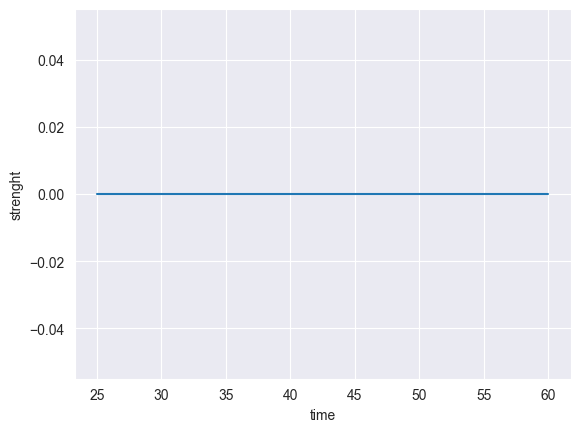

In [84]:
%pip install matplotlib
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
hero_own_st = list(hero_stats_time[59].items())
for i in range(len(hero_own_st)):
  hero_own_st[i]=list(hero_own_st[i])
  game_time=hero_own_st[i][0]
  time_category = None
  if game_time == 1:
      time_category = 25
  elif game_time == 2:
      time_category = 30
  elif game_time == 3:
      time_category = 32.5
  elif game_time == 4:
      time_category = 35
  elif game_time == 5:
      time_category = 37.5
  elif game_time == 6:
      time_category = 40
  elif game_time == 7:
      time_category = 50
  elif game_time == 8:
      time_category = 60
  hero_own_st[i][0]=time_category
gg=pd.DataFrame(hero_own_st,columns=['time', 'strenght'])
sns.set_style("darkgrid")
sns.lineplot(data=gg, x="time", y="strenght")

In [86]:
teams

,radiant,dire,radiant_win,duration
0,"{95: 1, 11: 2, 2: 3, 101: 4, 37: 5}","{46: 1, 36: 2, 102: 3, 26: 4, 22: 5}",0,2059.0
1,"{70: 1, 11: 2, 97: 3, 86: 4, 57: 5}","{41: 1, 74: 2, 2: 3, 101: 4, 79: 5}",0,1856.0
2,"{6: 1, 25: 2, 38: 3, 20: 4, 40: 5}","{13: 1, 100: 2, 58: 3, 55: 4, 56: 5}",0,2242.0
3,"{95: 1, 110: 2, 135: 3, 86: 4, 102: 5}","{76: 1, 79: 2, 103: 3, 49: 4, 99: 5}",1,1608.0
4,"{6: 1, 40: 2, 135: 3, 126: 4, 136: 5}","{67: 1, 106: 2, 38: 3, 138: 4, 110: 5}",0,2545.0
...,...,...,...,...
32120,"{70: 1, 11: 2, 14: 3, 107: 4, 22: 5}","{49: 1, 25: 2, 81: 3, 53: 4, 26: 5}",1,1557.0
32121,"{138: 1, 107: 2, 136: 3, 35: 4, 14: 5}","{36: 1, 46: 2, 102: 3, 9: 4, 110: 5}",0,2228.0
32122,"{15: 1, 126: 2, 135: 3, 131: 4, 51: 5}","{49: 1, 13: 2, 108: 3, 66: 4, 83: 5}",0,1991.0
32123,"{21: 1, 23: 2, 78: 3, 138: 4, 84: 5}","{72: 1, 19: 2, 33: 3, 128: 4, 100: 5}",0,3318.0


In [ ]:
train = pd.DataFrame()

train['r_synergy'] = teams_expanded[['r_1', 'r_2', 'r_3', 'r_4', 'r_5']].apply(lambda x: synergy(x.dropna().tolist()), axis=1)
train['d_synergy'] = teams_expanded[['d_1', 'd_2', 'd_3', 'd_4', 'd_5']].apply(lambda x: synergy(x.dropna().tolist()), axis=1)

train['carry_matchup'] = teams_expanded.apply(lambda x: carry_matchup.get((x['r_1'], x['d_1']),0.0),axis=1)
train['mid_matchup'] = teams_expanded.apply(lambda x: mid_matchup.get((x['r_2'], x['d_2']),0.0),axis=1)
train['offlane_matchup'] = teams_expanded.apply(lambda x: offlane_matchup.get((x['r_3'], x['d_3']),0.0),axis=1)

train['r_time'] = teams_expanded.apply(lambda x: time_strenght(x[['r_1', 'r_2', 'r_3', 'r_4', 'r_5']].dropna().tolist(), x['duration']), axis=1)
train['d_time'] = teams_expanded.apply(lambda x: time_strenght(x[['d_1', 'd_2', 'd_3', 'd_4', 'd_5']].dropna().tolist(), x['duration']), axis=1)

train['csynergy'] = teams_expanded.apply(lambda row: counter_synergy(row[['r_1', 'r_2', 'r_3', 'r_4', 'r_5']].dropna().tolist(), row[['d_1', 'd_2', 'd_3', 'd_4', 'd_5']].dropna().tolist()), axis=1)
train

In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import seaborn as sns
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score
import joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 8.1 MB/s eta 0:00:00


In [ ]:
y = target
X = train

In [ ]:
def evaluate_lgbm(params):
    params["objective"] = "binary"
    params["metric"] = "binary_logloss"
    params["boosting_type"] = "gbdt"
    params["verbosity"] = -1
    params["n_jobs"] = -1

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    aucs = []

    for train_idx, val_idx in kf.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx].values.ravel(), y.iloc[val_idx].values.ravel()

        model = lgb.LGBMClassifier(**params)
        model.fit(
            X_train, y_train,
            eval_set=[(X_val, y_val)],
            eval_metric="binary_error",
            callbacks = [lgb.early_stopping(100,verbose=False)]
        )

        preds = model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, preds)
        aucs.append(auc)

    return np.mean(aucs)


In [ ]:
def objective(trial):
    params = {
        "num_leaves": trial.suggest_int("num_leaves", 16, 256),
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.1, log=True),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.6, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.6, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 10),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "lambda_l1": trial.suggest_float("lambda_l1", 0.0, 5.0),
        "lambda_l2": trial.suggest_float("lambda_l2", 0.0, 5.0),
        "n_estimators": 1000,
    }

    return evaluate_lgbm(params)


In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=300)

In [ ]:
best_params = study.best_params.copy()
best_params.update({
    "objective": "binary",
    "metric": "binary_logloss",
    "boosting_type": "gbdt",
    "verbosity": -1,
    "n_jobs": -1,
})

final_model = lgb.LGBMClassifier(**best_params)
final_model.fit(X, y)


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


LGBMClassifier(bagging_fraction=0.6001337645021658, bagging_freq=8,
               feature_fraction=0.9167013213560182, lambda_l1=4.263501571660229,
               lambda_l2=4.697388993527136, learning_rate=0.03328920032190045,
               metric='binary_logloss', min_child_samples=34, n_jobs=-1,
               num_leaves=186, objective='binary', verbosity=-1)

In [ ]:
joblib.dump(final_model, "model.pkl")

['model.pkl']

In [ ]:
model = joblib.load("model.pkl")


In [ ]:
# вероятность победы Radiant
proba = model.predict_proba(X)[:, 1]

# бинарный прогноз (0 = Dire win, 1 = Radiant win)
pred = model.predict(X)


In [ ]:
acc = accuracy_score(y, pred)
auc = roc_auc_score(y, proba)
print(f"Final Accuracy: {acc:.4f}")
print(f"Final AUC: {auc:.4f}")


Final Accuracy: 0.9364
Final AUC: 0.9851


In [ ]:
def prediction(radiant, dire, model):
  r_synergy_val = synergy(radiant)
  d_synergy_val = synergy(dire)
  csynergy_val = counter_synergy(radiant, dire)

  local_data = []
  for duration in range(1,9):
    local_data.append([
              r_synergy_val,
              d_synergy_val,
              csynergy_val,
              time_strenght(radiant, duration, duration),
              time_strenght(dire, duration, duration)
              ])

  proba = model.predict_proba(local_data)
  return {"Radiant": proba[0][1], "Dire": proba[0][0], "Time": 1}, {"Radiant": proba[1][1], "Dire": proba[1][0], "Time": 2},\
    {"Radiant": proba[2][1], "Dire": proba[2][0], "Time": 3}, {"Radiant": proba[3][1], "Dire": proba[3][0], "Time": 4},\
     {"Radiant": proba[4][1], "Dire": proba[4][0], "Time": 5}, {"Radiant": proba[5][1], "Dire": proba[5][0], "Time": 6},\
     {"Radiant": proba[6][1], "Dire": proba[6][0], "Time": 7}, {"Radiant": proba[7][1], "Dire": proba[7][0], "Time": 8}

In [ ]:
prediction(
    [
     1,1,1,1,1
     ],[
     3,2,2,2,2
     ],
    model)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


({'Radiant': np.float64(0.337159204470505),
  'Dire': np.float64(0.662840795529495),
  'Time': 1},
 {'Radiant': np.float64(0.08318481218630873),
  'Dire': np.float64(0.9168151878136913),
  'Time': 2},
 {'Radiant': np.float64(0.27940858739600083),
  'Dire': np.float64(0.7205914126039992),
  'Time': 3},
 {'Radiant': np.float64(0.9472754826138814),
  'Dire': np.float64(0.05272451738611861),
  'Time': 4},
 {'Radiant': np.float64(0.06899174759113565),
  'Dire': np.float64(0.9310082524088643),
  'Time': 5},
 {'Radiant': np.float64(0.05752071458447051),
  'Dire': np.float64(0.9424792854155295),
  'Time': 6},
 {'Radiant': np.float64(0.4238130835451205),
  'Dire': np.float64(0.5761869164548795),
  'Time': 7},
 {'Radiant': np.float64(0.06899174759113565),
  'Dire': np.float64(0.9310082524088643),
  'Time': 8})